Для данной лабораторной работы был выбран другой датасет, более пригодный.
Этот набор данных представляет собой оценку эффективности музыкального образования, зависящей от успеваемости студентов, их физиологии, вовлеченности и т.д.

Датасет содержит следующие атрбуты:

Student_ID - номер студента (String) 
Age - возраст студента (Integer)
Gender - пол сутдента (String)
Class_Level - уровень музыкального образования (String)
Accuracy - точность воспроизведения музыки студентом (Float)
Rhythm - способность студента удерживать ритм (Float)
Tempo - темп выступления студента (Float)
Pitch_Accuracy - оценка точности подачи в выступлении студента (Float)
Duration - время игры студента (Float)
Volume - громкость выступления студента (Float)
Heart_Rate - пульс студента во время урока (Float)
Blood_Pressure - давление студента во время урока (Float)
Stress_Level - уровень стресса студента (от 1 до 10) (Integer)
Engagement_Level - уровень вовлеченности студента (Integer)
Focus_Time - время фокусировки студента на задании (Float)
Behavioral_Patterns - оценка отвлеченности студента (Integer)
Performance_Score - оценка выступления студента (Float)
Skill_Development - оценка развития музыкальных навыков студента (Integer)
Engagement_Score - оценка врвлеченности студента (Float)
Lesson_Type - тип урока (String) 
Instrument_Type - вид инструмента (String)

В качестве целевого класса можно взять атрибут Gender (пол студента).

In [50]:
!pip show scikit-learn

import sys
sys.path.append('/users/maria/new/sklearn-env/lib/site-packages')

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\2505z\Anac\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn


In [51]:
import numpy as np       #импортируем нужные библиотеки
import pandas as pan
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plot
from sklearn.model_selection import cross_val_score

db = pan.read_csv('music_education_dataset.csv')     #подключаем наш датасет
# db.head()

Для удобства сделаем так, чтобы в колонке Gender вместо названий стояли цифры 0 и 1 (0 - мужчина, 1 - женщина):

In [53]:
for i in range(len(db['Gender'])):
    if db['Gender'][i] == 'Female':
        db.loc[i, 'Gender'] = 1
    else:
        db.loc[i, 'Gender'] = 0

db.head()

,Student_ID,Age,Gender,Class_Level,Accuracy,Rhythm,Tempo,Pitch_Accuracy,Duration,Volume,...,Stress_Level,Engagement_Level,Focus_Time,Behavioral_Patterns,Performance_Score,Skill_Development,Engagement_Score,Timestamp,Lesson_Type,Instrument_Type
0,S001,12,1,Intermediate,71.053342,94.391587,142.863298,88.828261,336.481857,86.428281,...,10,5,453.536655,1,94.833652,2,9.328391,2024-12-09 14:49:00,Theory,Guitar
1,S002,11,0,Advanced,77.352080,72.841144,142.035970,87.043906,371.244505,57.301702,...,2,4,474.173715,2,98.079703,1,3.660859,2024-12-09 16:15:00,Practical,Violin
2,S003,13,1,Intermediate,93.776395,94.781988,110.298237,92.283188,481.536745,83.494998,...,3,1,463.233013,1,70.785586,5,8.367379,2024-12-09 05:42:00,Practical,Guitar
3,S004,16,1,Intermediate,77.101801,90.951063,100.547725,99.515410,259.091623,61.625075,...,7,5,346.641786,2,67.387286,2,4.553207,2024-12-09 03:29:00,Theory,Violin
4,S005,11,0,Beginner,80.318380,72.558753,175.980186,85.663472,200.832085,71.774177,...,5,10,150.255627,1,94.733900,4,6.173388,2024-12-09 16:22:00,Practical,Guitar


Удалим все столбцы со строками:

In [55]:
db = db.drop('Student_ID', axis = 1)

In [56]:
db = db.drop('Class_Level', axis = 1)

In [57]:
db = db.drop('Timestamp', axis = 1)

In [58]:
db = db.drop('Lesson_Type', axis = 1)

In [59]:
db = db.drop('Instrument_Type', axis = 1)
db.head()

,Age,Gender,Accuracy,Rhythm,Tempo,Pitch_Accuracy,Duration,Volume,Heart_Rate,Blood_Pressure,Stress_Level,Engagement_Level,Focus_Time,Behavioral_Patterns,Performance_Score,Skill_Development,Engagement_Score
0,12,1,71.053342,94.391587,142.863298,88.828261,336.481857,86.428281,98.795238,123.294664,10,5,453.536655,1,94.833652,2,9.328391
1,11,0,77.352080,72.841144,142.035970,87.043906,371.244505,57.301702,61.752281,115.143425,2,4,474.173715,2,98.079703,1,3.660859
2,13,1,93.776395,94.781988,110.298237,92.283188,481.536745,83.494998,67.050903,110.066057,3,1,463.233013,1,70.785586,5,8.367379
3,16,1,77.101801,90.951063,100.547725,99.515410,259.091623,61.625075,76.125796,124.201610,7,5,346.641786,2,67.387286,2,4.553207
4,11,0,80.318380,72.558753,175.980186,85.663472,200.832085,71.774177,95.518934,112.790960,5,10,150.255627,1,94.733900,4,6.173388


Разделим наш датасет на две части: одна часть будет содержать только колонку с полом студента, а другая часть - все остальное:

In [61]:
y = db['Gender']
x = db.drop('Gender', axis = 1)

In [62]:
x.head()

,Age,Accuracy,Rhythm,Tempo,Pitch_Accuracy,Duration,Volume,Heart_Rate,Blood_Pressure,Stress_Level,Engagement_Level,Focus_Time,Behavioral_Patterns,Performance_Score,Skill_Development,Engagement_Score
0,12,71.053342,94.391587,142.863298,88.828261,336.481857,86.428281,98.795238,123.294664,10,5,453.536655,1,94.833652,2,9.328391
1,11,77.352080,72.841144,142.035970,87.043906,371.244505,57.301702,61.752281,115.143425,2,4,474.173715,2,98.079703,1,3.660859
2,13,93.776395,94.781988,110.298237,92.283188,481.536745,83.494998,67.050903,110.066057,3,1,463.233013,1,70.785586,5,8.367379
3,16,77.101801,90.951063,100.547725,99.515410,259.091623,61.625075,76.125796,124.201610,7,5,346.641786,2,67.387286,2,4.553207
4,11,80.318380,72.558753,175.980186,85.663472,200.832085,71.774177,95.518934,112.790960,5,10,150.255627,1,94.733900,4,6.173388


In [63]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: object

In [64]:
y=y.astype('int')

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout):

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(x, y, test_size=0.3, random_state=17)

Обучим дерево решений:

In [68]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(random_state=17)
np.mean(cross_val_score(tree_1, X_train, y_train, cv=5))

0.5

Обучим модель knn:

In [70]:
import os

os.environ['OMP_NUM_THREADS'] = '1'

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier()
np.mean(cross_val_score(knn_1, X_train, y_train, cv=5))

0.5142857142857142

Настроим max_depth для дерева:

In [73]:
from sklearn.model_selection import GridSearchCV

tree_params = {"max_depth": np.arange(1, 11), "min_samples_split": [2, 5, 10]}
tree_grid = GridSearchCV(tree_1, tree_params, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': [2, 5, 10]})

In [74]:
tree_grid.best_score_, tree_grid.best_params_

(0.6142857142857142, {'max_depth': 1, 'min_samples_split': 2})

Теперь для knn:

In [76]:
knn_params = {"n_neighbors": [1, 2, 3, 4] + list(range(5, 30, 5))}
knn_grid = GridSearchCV(knn_1, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20, 25]})

In [77]:
knn_grid.best_score_, knn_grid.best_params_

(0.5857142857142857, {'n_neighbors': 20})

Сделаем прогнозы для отложенной выборки:

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, RocCurveDisplay

tree_pred = tree_grid.predict(X_holdout)
knn_pred = knn_grid.predict(X_holdout)

Оценим результаты с помощью Accuracy:

In [81]:
accuracy_score(y_holdout, tree_pred), accuracy_score(y_holdout, knn_pred)

(0.43333333333333335, 0.5)

Оценим результаты с помощью Precision:

In [83]:
precision_score(y_holdout, tree_pred), precision_score(y_holdout, knn_pred)

(0.46153846153846156, 0.5)

Оценим результаты с помощью Recall:

In [85]:
recall_score(y_holdout, tree_pred), recall_score(y_holdout, knn_pred)

(0.8, 0.6666666666666666)

Оценим результаты с помощью F-measure:

In [87]:
f1_score(y_holdout, tree_pred), f1_score(y_holdout, knn_pred)

(0.5853658536585366, 0.5714285714285714)

Оценим результаты с помощью ROC:

In [89]:
tree_pred_proba = tree_grid.predict_proba(X_holdout)
tree_pred_proba
knn_pred_proba = knn_grid.predict_proba(X_holdout)
knn_pred_proba

array([[0.4 , 0.6 ],
       [0.5 , 0.5 ],
       [0.35, 0.65],
       [0.35, 0.65],
       [0.25, 0.75],
       [0.55, 0.45],
       [0.4 , 0.6 ],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.35, 0.65],
       [0.5 , 0.5 ],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.45, 0.55],
       [0.5 , 0.5 ],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ]])

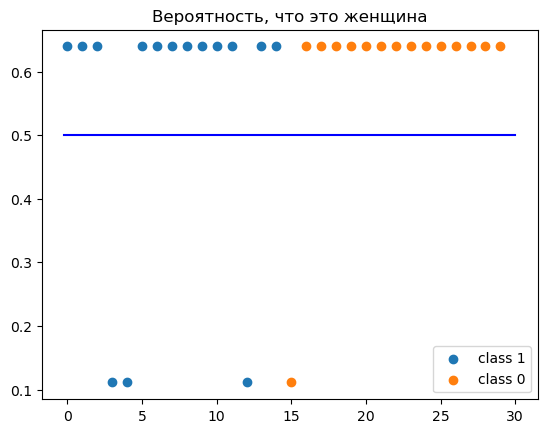

In [90]:
threshold = 0.5

class_0 = tree_pred_proba[:, 1][y_holdout == 0]
class_1 = tree_pred_proba[:, 1][y_holdout == 1]

plot.scatter(np.arange(len(class_1)), class_1, label='class 1')
plot.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class 0')
plot.plot([-0.2, len(tree_pred_proba[:, 1])], [threshold, threshold], c='b')
plot.title('Вероятность, что это женщина')
plot.legend()

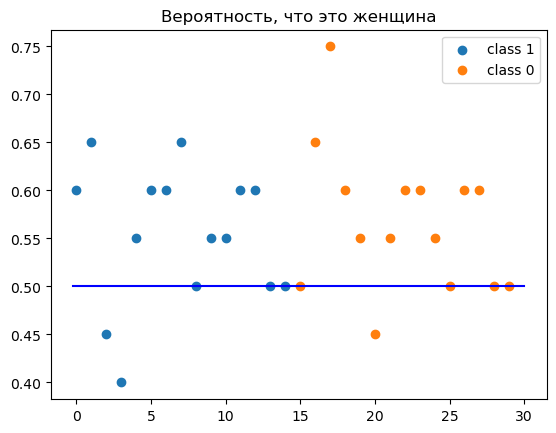

In [91]:
class_0 = knn_pred_proba[:, 1][y_holdout == 0]
class_1 = knn_pred_proba[:, 1][y_holdout == 1]
plot.scatter(np.arange(len(class_1)), class_1, label='class 1')
plot.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class 0')
plot.plot([-0.2, len(knn_pred_proba[:, 1])], [threshold, threshold], c='b')
plot.title('Вероятность, что это женщина')
plot.legend()

Text(0.5, 1.0, 'ROC_curve')

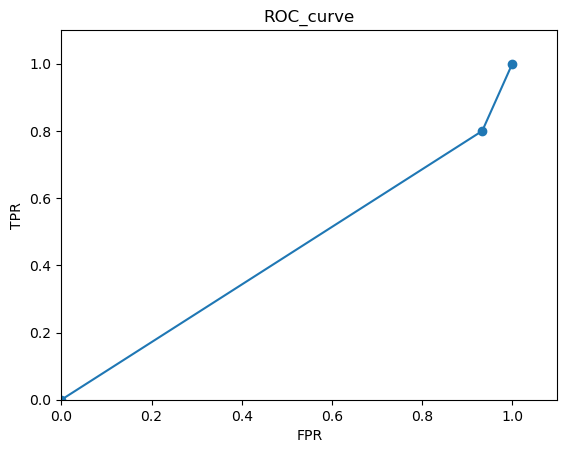

In [92]:
fprs, tprs, thr = roc_curve(y_holdout, tree_pred_proba[:, 1])

plot.plot(fprs, tprs, marker='o')
plot.ylim([0, 1.1])
plot.xlim([0, 1.1])
plot.xlabel('FPR')
plot.ylabel('TPR')
plot.title('ROC_curve')

Text(0.5, 1.0, 'ROC_curve')

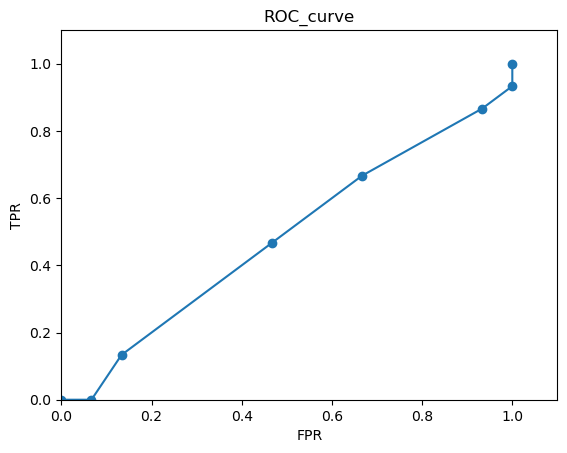

In [94]:
fprs, tprs, thr = roc_curve(y_holdout, knn_pred_proba[:, 1])

plot.plot(fprs, tprs, marker='o')
plot.ylim([0, 1.1])
plot.xlim([0, 1.1])
plot.xlabel('FPR')
plot.ylabel('TPR')
plot.title('ROC_curve')

Построим дерево решений:

In [ ]:
!pip install pydotplus

In [ ]:
tree_2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
tree_2.fit(x, y)

from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image, display

data = StringIO()
export_graphviz(tree_2, feature_names=x.columns, out_file=data, filled=True)
graph = pydotplus.graph_from_dot_data(data.getvalue())
display(Image(graph.create_png()))